<h1><font color = 'brown' size = '6'>
<b>
Classify Small Photos of Objects
</b>
</font>
</h1>

<h1>
<ul>
<font color = 'brown green' size = '3'>
<b>

<li>
The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning.
</li><br>

<li>
Although the dataset is effectively solved, it can be used as the basis for
learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch.
</li><br>

</b>
</font>
</ul>
</h1>

<h1><font color = 'brown' size = '6'>
<b>
CIFAR-10 Photo Classification Dataset
</b>
</font>
</h1>

<h1>
<ul>
<font color = 'brown green' size = '3'>
<b>

<li>
CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.
</li><br>

<li>
The dataset is comprised of 60,000, 32 × 32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc.
</li><br>

<li>
The class labels and their standard associated integer values are listed below.
</li><br>

<li>
0: airplane
</li><br>
<li>
1: automobile
</li><br>
<li>
2: bird
</li><br>
<li>
3: cat
</li><br>
<li>
4: deer
</li><br>
<li>
5: dog
</li><br>
<li>
6: frog
</li><br>
<li>
7: horse
</li><br>
<li>
8: ship
</li><br>
<li>
9: truck
</li><br>

<li>
These are very small images, much smaller than a typical photograph, as the dataset was intended for computer vision research.
</li><br>

<li>
CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning.
</li><br>

</b>
</font>
</ul>
</h1>

1. import the required libraries.

In [45]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

2. load train and test dataset

In [36]:
def load_dataset():
  # load dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  # one hot encode target values
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return x_train, y_train, x_test, y_test

3. show some training images

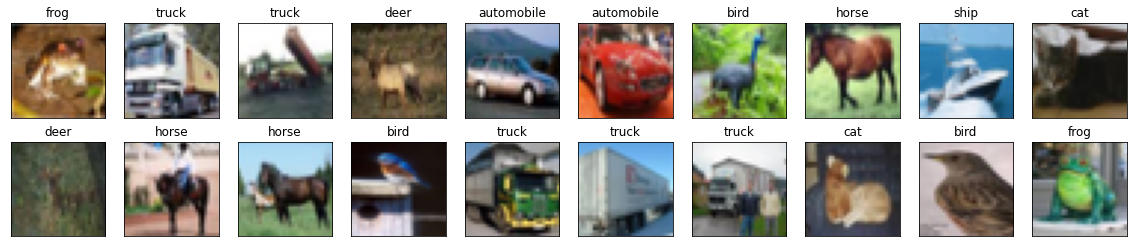

In [37]:
train_images, train_labels, _, _ = load_dataset()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  plt.subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(train_images[idx])
  plt.title(labels[train_labels[idx].argmax()])

4. scale pixels

In [38]:
def prep_pixels(train, test):
  
  # convert from intger to float
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # normalize the range 1-0
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # return normalized images
  return train_norm, test_norm

5. define CNN model

In [39]:
def define_model():

  model = Sequential()

  # 1st convolution block
  model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), kernel_initializer = 'he_uniform', padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.2))
  
  # 2nd convolution block
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.3))

  # 3rd convolution block
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.4))
  
  # Flatten layer
  model.add(Flatten())

  # 1st Dense layer
  model.add(Dense(units = 128, kernel_initializer = 'he_uniform', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # 2nd Dense layer
  model.add(Dense(units = 10, activation = 'softmax'))
  
  # compile the model
  opt = SGD(learning_rate = 0.001, momentum = 0.9)
  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

  return model


cnn_model = define_model()
cnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_71 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_72 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

5. plot diagnostic learning curves

In [42]:
def summarize_diagnostics(history):

  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color = 'blue', label = 'train')
  plt.plot(history.history['val_loss'], color = 'orange', label = 'test')

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'test')

6. run the test harness for evaluating a model

Epoch 1/25
781/781 [==============================] - 28s 35ms/step - loss: 2.1230 - accuracy: 0.3037 - val_loss: 1.4603 - val_accuracy: 0.4631
Epoch 2/25
781/781 [==============================] - 28s 35ms/step - loss: 1.6097 - accuracy: 0.4114 - val_loss: 1.5025 - val_accuracy: 0.4516
Epoch 3/25
781/781 [==============================] - 27s 35ms/step - loss: 1.4914 - accuracy: 0.4529 - val_loss: 1.4245 - val_accuracy: 0.4743
Epoch 4/25
781/781 [==============================] - 30s 38ms/step - loss: 1.4184 - accuracy: 0.4833 - val_loss: 1.4694 - val_accuracy: 0.4760
Epoch 5/25
781/781 [==============================] - 27s 35ms/step - loss: 1.3550 - accuracy: 0.5097 - val_loss: 1.5124 - val_accuracy: 0.4601
Epoch 6/25
781/781 [==============================] - 27s 35ms/step - loss: 1.2986 - accuracy: 0.5315 - val_loss: 1.3615 - val_accuracy: 0.5149
Epoch 7/25
781/781 [==============================] - 27s 34ms/step - loss: 1.2575 - accuracy: 0.5438 - val_loss: 1.4614 - val_accuracy:

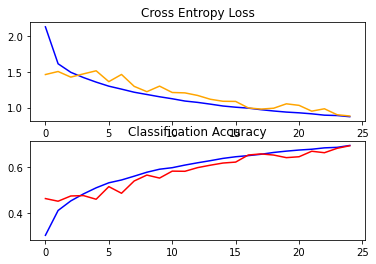

In [44]:
def run_test_harness():

  # load dataset
  x_train, y_train, x_test, y_test = load_dataset()

  # prepare pixel data
  x_train, x_test = prep_pixels(x_train, x_test)

  # define model
  model = define_model()

  # create data generator
  datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

  # prepare iterator
  it_train = datagen.flow(x_train, y_train, batch_size = 64)

  # fit the model
  steps = int(x_train.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch = steps, epochs = 25, validation_data = (x_test, y_test))
  
  # save the trained model
  model.save('/content/drive/MyDrive/Deep Learning and Computer Vision/saved_models/cnn_cifar10.h5')

  # learning curves
  summarize_diagnostics(history)

  # evaluate the model
  _, acc = model.evaluate(x_test, y_test)
  print('> %.3f' % (acc * 100.0))

# run the test harness
run_test_harness()

7. load the trained model

In [46]:
model = load_model('/content/drive/MyDrive/Deep Learning and Computer Vision/saved_models/cnn_cifar10.h5')

8. test model on some images

In [68]:
# target classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# load test data
x_train, y_train, x_test, y_test = load_dataset()

# normalize pixel data
x_train, x_test = prep_pixels(x_train, x_test)

# predict the target classes of test images
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


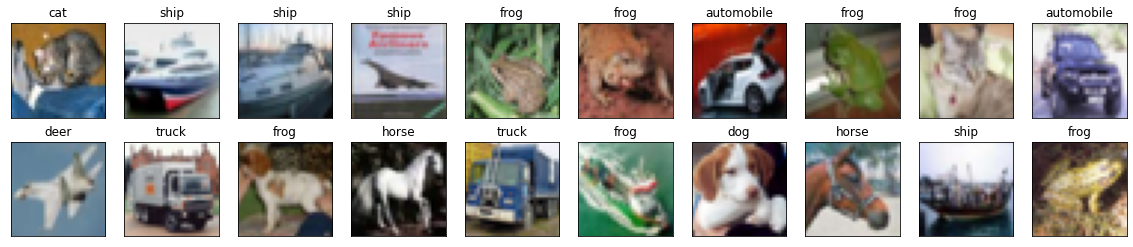

In [74]:
# plot test images with thier predicted classes by the cnn model
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  plt.subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx])
  plt.title(classes[y_pred[idx].argmax()])